<a href="https://colab.research.google.com/github/JohanvandenHeuvel/implementations/blob/main/LinearModel_LeastSquares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pylab as plt

## Regression

In [2]:
num_datapoints = 100
line = np.arange(num_datapoints)
noise = np.random.normal(loc=0, scale=5, size=num_datapoints)
x = line + noise

slope = 1.5
intercept = 0

y =  intercept + slope * x

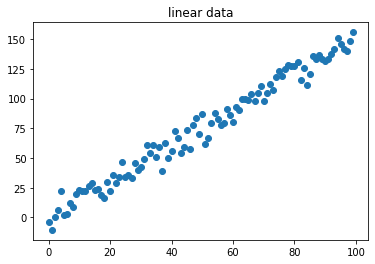

In [3]:
plt.plot(y, 'o')
plt.title("linear data")
plt.show()

In [4]:
estimated_parameters = np.linalg.pinv(np.expand_dims(x, axis=1)) @ y
predictions = np.arange(num_datapoints).T * estimated_parameters

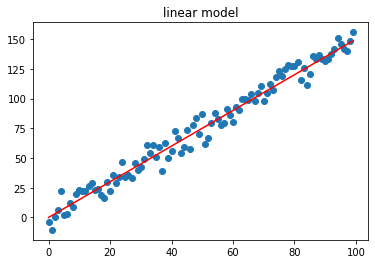

In [5]:
plt.plot(y, 'o')
plt.plot(predictions, color="r")
plt.title("linear model")
plt.show()

## Classification

In [6]:
classA = np.random.multivariate_normal(mean=[1,1], cov=[[1,0],[0,1]], size=num_datapoints)
classB = np.random.multivariate_normal(mean=[-1,-1], cov=[[1,0],[0,1]], size=num_datapoints)

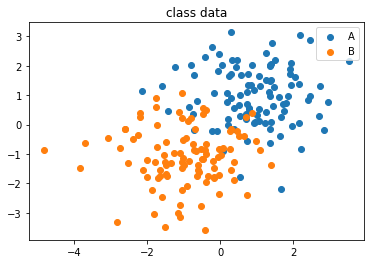

In [7]:
plt.scatter(x = classA.T[0], y = classA.T[1], label="A")
plt.scatter(x = classB.T[0], y = classB.T[1], label="B")
plt.legend()
plt.title("class data")
plt.show()

In [8]:
x = np.vstack((classA, classB))
y = np.hstack((np.zeros(shape=len(classA)), np.ones(shape=len(classB))))

In [9]:
estimated_parameters = np.linalg.pinv(x) @ y
decision_boundary = (np.linspace(-4, 4) * (-estimated_parameters[0] / estimated_parameters[1]))
predictions = x @ estimated_parameters

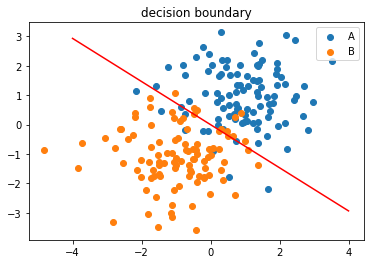

In [10]:
plt.scatter(x = classA.T[0], y = classA.T[1], label="A")
plt.scatter(x = classB.T[0], y = classB.T[1], label="B")
plt.plot(np.linspace(-4, 4), decision_boundary, color="r")
plt.legend()
plt.title("decision boundary")
plt.show()